___

# Insper - Ciência dos Dados #
___
**Projeto 1 | Stephanie Liu**

**Engenharia 2B**

O Projeto 1 de Ciência dos Dados é baseada em realizar análise exploratória referência: Aula do Professor Fábio Miranda e o Livro de Noções de Probabilidade e Estatísca (Autor: Marcos Magalhães & Antônio de Lima)  

---
# Perguntas a serem respondidas #
1. Desde as conferencias do Earth Summit, a partir de 92 os países começarem a incentivar mais em energia renovável? Causando assim uma queda significativa de CO2 em relação ao todo? 
___

# Introdução #
    United Nations Conference on Environment and Development (UNCED) ou Conferência das Nações Unidas sobre  Meio Ambiente e Desenvolvimento (UNCED), Cúpula da Terra
**Explicação da hipótese** 

Desde 1990, a comunidade internacional reuniu 12 importantes conferências que comprometeram os governos a tratar urgentemente de alguns dos problemas mais urgentes que o mundo enfrenta atualmente. A primeira conferência é a de Estocolmo, porém não houve muitos avanços nesta conferência. A segunda aconteceu no Rio de Janeiro em 92. Logo, a partir do Earth Summit de 92 os países entraram em um consenso para que houvesse a diminuição da emissão de gases.

Com o decorrer dos anos foi se percebendo cada vez mais a importância do cuidado que temos que ter com o meio ambiente havendo mais 10 conferências futuas, passando por revisões e discussões, como o protocolo de kyoto e entre outras. 

O Link 5(das Referências), apesar de serem apenas dados da Alemanha, é possível ver o quanto de emissão desses gases, apenas na Alemanha foram evitados, seguindo esses dados, é possível ver que há um montante significativo de Gases que não foram emitidos. 

Segundo os artigos científicos lidos (tendo este como exemplo, https://www.sciencedirect.com/science/article/pii/S0961953406000389) a cada 1000 KWh de energia renovável produzida cerca de 305 toneladas de Gás carbônico são evitadas.

Seguindo a linha de racicionio dos dados analisados da Alemanha e do dado do artigo científico, caso os países começassem a investir em energia renovavel, teoricamente haveria uma diminuição na emissão de gases de efeito estufa. Contudo, há uma chance de que esse tempo,de 92 até hoje em dia, não foi possível alcançar o desejável, em que houvesse alguma alteração significativa.

Além disso, em 2015 houve o acordo para a Agenda 2030 em que um dos objetivos é a energia renovavel. Desta forma, os países que concordaram com esses objetivos da Agenda 2030, principalmente para os países mais desenvolvidos, tem uma pressão política internacional.

Logo, provavelmente houve a diminuição de gases de efeito estufa, mas pelo pouco tempo não deve haver uma diferença significativa no montante de todo os gases emitidos, pois estes, por sua vez, não provém apenas da produção de energia.

**Explicação do mecanismo** 

Como a Conferência do Rio de Janeiro de 1992 houve um consenso entre os países, sobre as questões ambietalistas é viável analisarmos a media do crescimento de produção de energia renovaveis de 1992 e 2014 (anos em que apresentavam dados viáveis de serem estudados)

Comparar os países que não estão entre os países que participaram das conferências em relação ao quanto de energia renovável estão produzindo e o quanto de gases de efeito estufa são evitados. 

Além disso, poderemos ver se há alguma correlação entre o PIB dos países e seus investimentos nas energias renováveis e o menor consumo de combustíveis fosséis. Outro fator seria a porcentagem da energia produzida no país, quanto desse todo provém de fontes renovável  

___

In [36]:
#------------------------ Importando as Bibliotecas --------------------------
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt


In [37]:
#------------------------ Files --------------------------
eletricity_generation = pd.read_excel('electricity_generation_total.xlsx')
gdp = pd.read_excel("GDP_WorldBank.xls", sheet_name="Data", skiprows=3)
attendend_92 = pd.read_excel("PaisesParticipantes.xls")
green_energy = pd.read_excel("EnergyGreen.xls", sheet_name="Data", skiprows=3)


---
# Filtração dos dados #

Como estamos analisando a partir do Earth Summit de 92 que aconteceu no Rio de Janeiro, faz sentido pegarmos os dados de 1992 a 2014 inicialmente(apesar dos dados apresentarem do ano de 2015, muitos valores estão sem dados). Para comparar como está se comportando a produção de energia renóvavel e o consumo de combustíveis fosséis 

Além disso, precisamos filtrar os países que participaram dessa conferência para conseguir analisar primeiramente o antes e o depois dos países participantes da conferência.

---


In [38]:
#---------------------------- Mudando o Indice -----------------------------
country_idx = attendend_92.set_index('Paises participantes')
greenenergy_idx = green_energy.set_index("Country Name")
gdp_idx = gdp.set_index('Country Name')
eletricity_generation_idx = eletricity_generation.set_index("country")

In [39]:
# ----------------------------- Filtração 1--------------------------- 
Energy_Green = greenenergy_idx[greenenergy_idx.columns[35:58]]
GDP = gdp_idx[gdp_idx.columns[35:58]]
Eletricity_Generation = eletricity_generation_idx[eletricity_generation_idx.columns[7:30]]
Energy_Green_Co = greenenergy_idx[greenenergy_idx.columns[35:58]]

In [40]:
#------------------------------------ Filtração 2 ------------------------------------------
EnergyGreen = greenenergy_idx.loc[:,[1992, "2014"]]
GDP2 = gdp_idx.loc[:,[1992, "2014"]]
Eletricity_Generation1 = eletricity_generation_idx.loc[:,[1992,"2014"]]




In [41]:
#------------------------------------ Filtração 2 ------------------------------------------
EnergyGreen = greenenergy_idx.loc[:,[1992, "2014"]]
GDP_2 = gdp_idx.loc[:,[1992, "2014"]]
Eletricity_Generation1 = eletricity_generation_idx.loc[:,[1992,"2014"]]


---
# Junção dos Dados #

Há uma interseção dos dados, ou seja, há uma limpeza dos países, nestes casos, que não participaram da conferência 
Já que futuramente iremos analisar o antes e o depois dos países que estiverem presentes na conferência

---

In [42]:
# ------------------------------ Junção dos dados ------------------------------ 
Energy_Green_Join = country_idx.join(Energy_Green, how='inner', lsuffix='_Country', rsuffix='_EGreen')
GDP3 = country_idx.join(GDP, how='inner', lsuffix='_Country', rsuffix='_GDP')
Eletricity_Generation2 = country_idx.join(Eletricity_Generation,  how='inner', lsuffix='_Country', rsuffix='_Energy')

Energy_Green_12345 = greenenergy_idx[greenenergy_idx.columns[35:58]]
E = country_idx.join(Energy_Green_12345, how='inner', lsuffix='_Country', rsuffix='_EGreen')


---
# Limpeza de dados #

Para dados que não possuem valores numericos haverá uma limpeza, além de uma organização como inversão da linha e coluna

---

In [43]:
#------------------------ para plotar -------------------------------------
y = Eletricity_Generation2
x = y.index

In [44]:
#--------------- Limpeza de dados que possuem valores que não são valores -------
e = y.dropna()
clean_energy = Energy_Green_Join.dropna()

In [67]:
energia_total =e.T


In [69]:
energia_verde_t = Energy_Green_Join.T
#energia_verde_t.head()

---

# Inicio Da Analise #
    Primeira Parte: um cálculo da média de produção tanto da energia total quanto de energia renovável.Tendo dessa forma uma melhor visão dos dados
    coletados  
    Segunda Parte: Está sendo analisado duas variaveis quantitativas neste caso será entre a GDP e a produção de energia renovavel havendo desta forma
    uma analise de paises que estão dentro das conferencias. Sendo possível ver a correlação das variaveis, quanto mais proximas de zero menos é possível
    correlacionalas quanto mais proximas de um, mais correlacionadas estão.
    Terceira Parte: Os Gráficos do tipo Boxplot servem para comparar as medias, medianas e as posições dos quartis 
    Quarta Parte: Calculo do Co2 evitado
---

## Primeira Parte: 
        um cálculo da média de produção tanto da energia total quanto de energia renovável 
        Tendo dessa forma uma melhor visão dos dados coletados  

In [79]:
energia_total_media = Eletricity_Generation2.mean()
energia_verde_media = Energy_Green_Join.mean()


No handles with labels found to put in legend.


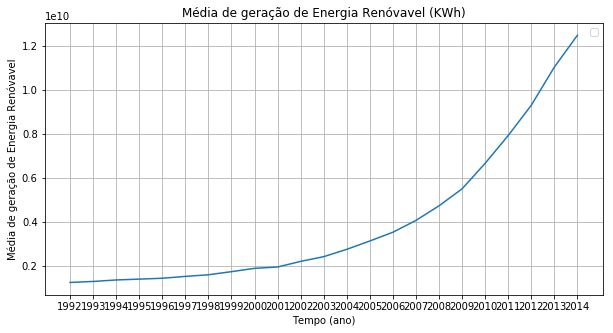

In [80]:
plt.plot(energia_verde_media,)
plt.title("Média de geração de Energia Renóvavel (KWh)")
plt.xlabel("Tempo (ano)")
plt.ylabel("Média de geração de Energia Renóvavel")
plt.legend()
plt.grid(True)
plt.rcParams["figure.figsize"] = [10,5]
plt.show()


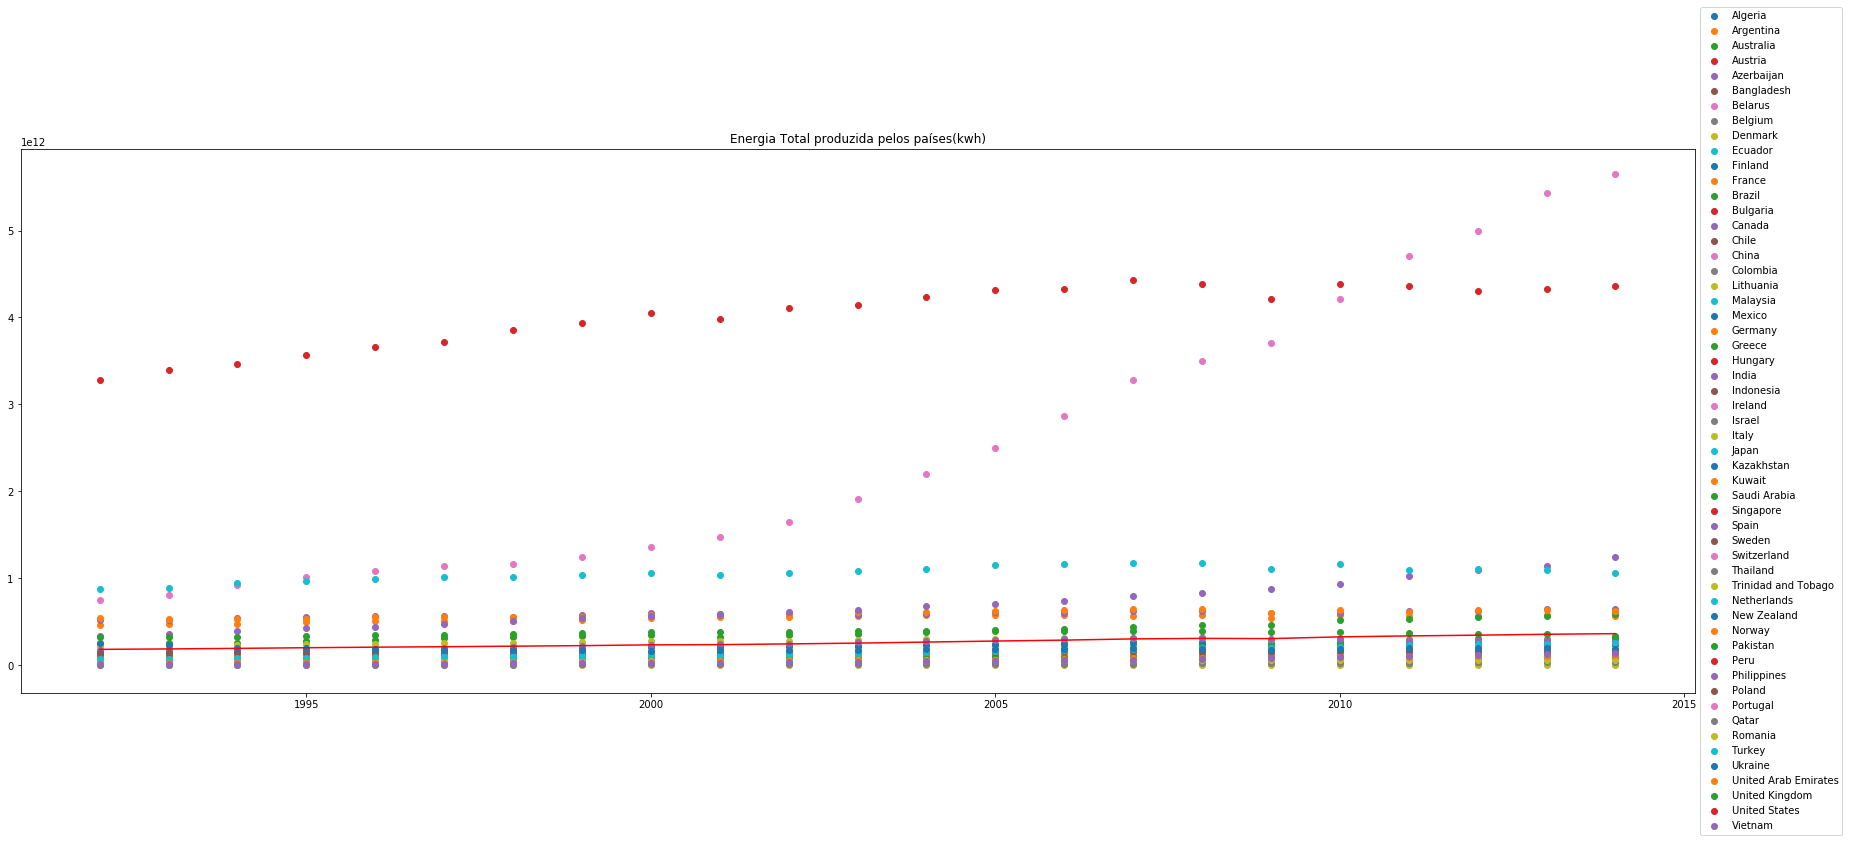

In [84]:
plt.figure(figsize=(30,10))

for pais in energia_total.columns:
    plt.scatter(x=energia_total.index, y=energia_total[pais])
plt.title("Energia Total produzida pelos países(kwh)")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.plot(energia_total_media.index,  energia_total_media, color="r")
#plt.plot(energia_verde_media.index, energia_verde_media, color="c")


In [ ]:
energia_verde = Energy_Green_Join.T


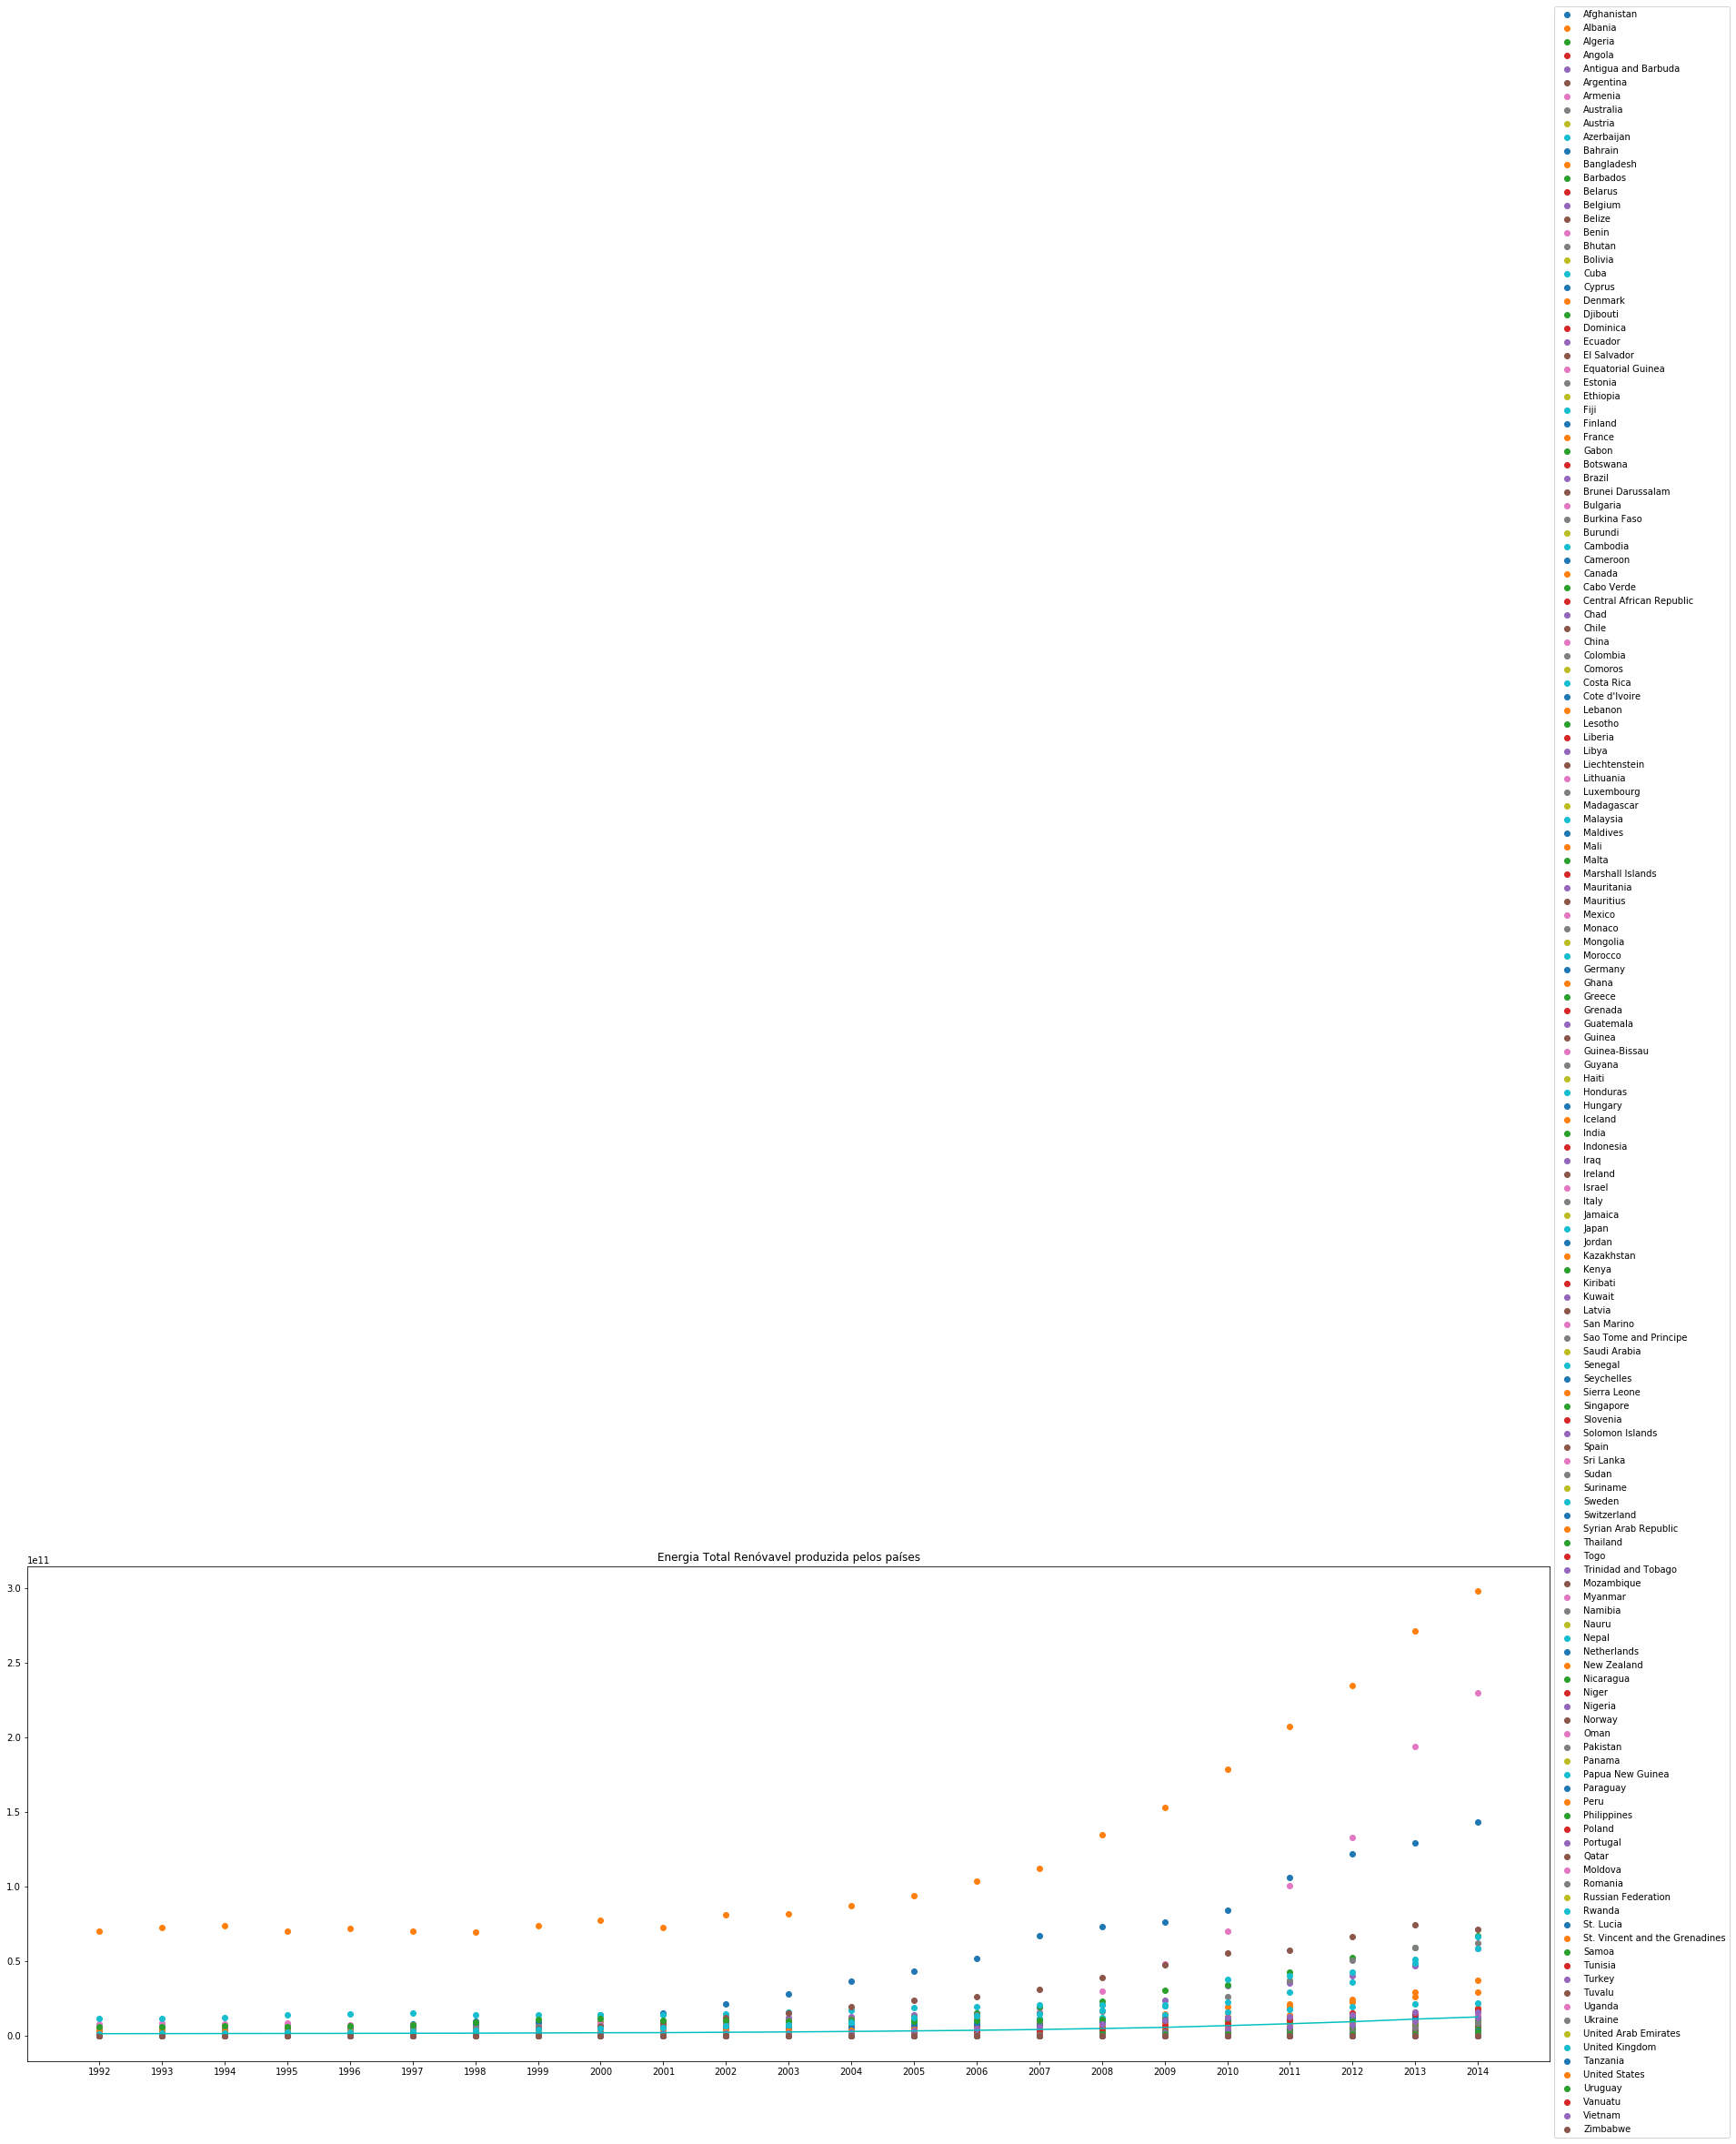

In [86]:
plt.figure(figsize=(30,10))
for pais in energia_verde.columns:
    plt.scatter(x=energia_verde.index, y=energia_verde[pais])
    plt.legend(loc="center left", bbox_to_anchor=(1,2))
    plt.title("Energia Total Renóvavel produzida pelos países")
plt.plot(energia_verde_media.index, energia_verde_media, color="c")

## Segunda Parte: 
     Está sendo analisado duas variaveis quantitativas neste caso será entre a GDP e a produção de energia renovavel havendo desta forma uma analise de
     paises que estão dentro das conferencias. Sendo possível ver a correlação das variaveis, quanto mais proximas de zero menos é possível
     correlacionalas quanto mais proximas de um, mais correlacionadas estão.

In [87]:
paises_participantes = ["Afghanistan","Albania","Algeria","Angola","Antigua and Barbuda","Argentina","Armenia","Australia","Austria","Azerbaijan","Bahrain","Bangladesh","Barbados","Belarus","Belgium","Belize","Benin","Bhutan","Bolivia","Cuba",
                        "Cyprus","Korea, Rep.","Denmark","Djibouti","Dominica","Ecuador","Egypt, Arab Rep.","El Salvador","Equatorial Guinea","Estonia","Ethiopia","Fiji",
                        "Finland","France","Gabon","Botswana","Brazil","Brunei Darussalam","Bulgaria","Burkina Faso",
                        "Burundi","Cambodia","Cameroon","Canada","Cabo Verde","Central African Republic","Chad","Chile","China","Colombia","Comoros","Costa Rica","Cote d'Ivoire","Lebanon","Lesotho","Liberia","Libya","Liechtenstein",
                        "Lithuania","Luxembourg","Madagascar","Malaysia","Maldives","Mali","Malta","Marshall Islands",
                        "Mauritania","Mauritius","Mexico","Monaco","Mongolia","Morocco","Gambia, The","Germany","Ghana","Greece","Grenada","Guatemala","Guinea","Guinea-Bissau","Guyana","Haiti","Honduras","Hungary","Iceland","India",
                        "Indonesia","Iran, Islamic Rep.","Iraq","Ireland",
                        "Israel","Italy","Jamaica","Japan","Jordan","Kazakhstan","Kenya","Kiribati","Kuwait",
                        "Latvia","San Marino","Sao Tome and Principe","Saudi Arabia","Senegal","Seychelles","Sierra Leone","Singapore","Slovenia","Solomon Islands","Spain","Sri Lanka","Sudan","Suriname","Sweden","Switzerland","Syrian Arab Republic",
                        "Thailand","Togo","Trinidad and Tobago","Mozambique","Myanmar","Namibia","Nauru","Nepal","Netherlands","New Zealand","Nicaragua","Niger","Nigeria","Norway","Oman","Pakistan","Panama","Papua New Guinea","Paraguay","Peru","Philippines","Poland","Portugal",
                        "Qatar","Moldova","Romania","Russian Federation","Rwanda","St. Lucia","St. Vincent and the Grenadines","Samoa","Tunisia","Turkey","Tuvalu","Uganda","Ukraine","United Arab Emirates",
                        "United Kingdom","Tanzania","United States",
                        "Uruguay","Vanuatu","Venezuela, RB","Vietnam","Yemen, Rep.","Zimbabwe","Congo, Dem. Rep.","Congo, Rep."]

In [88]:
Energy_Green.loc[:,"Paises"] = "não"
GDP2.loc[:,"Paises"] = "não"

In [89]:
Energy_Green.loc[paises_participantes, "Paises"] = "sim"
GDP2.loc[paises_participantes,"Paises"] = "sim"
#Energy_Green["Paises"]

In [90]:
Energy_Green.Paises.value_counts()

sim    164
não    100
Name: Paises, dtype: int64

In [91]:
GDP2.Paises.value_counts()

sim    164
não    100
Name: Paises, dtype: int64

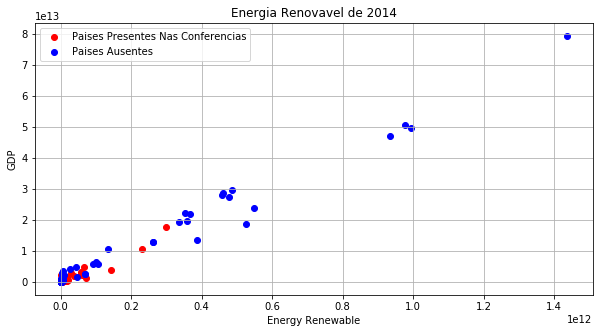

In [92]:
plt.scatter(Energy_Green.loc[Energy_Green.Paises=="sim","2014"], GDP2.loc[GDP2.Paises=="sim", "2014"], color="r", label="Paises Presentes Nas Conferencias")
plt.scatter(Energy_Green.loc[Energy_Green.Paises=="não","2014"], GDP2.loc[GDP2.Paises=="não", "2014"], color="b", label="Paises Ausentes")
plt.title("Energia Renovavel de 2014")
plt.xlabel("Energy Renewable")
plt.ylabel("GDP")
plt.legend()
plt.grid(True)
plt.show()

In [93]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    print("Taxa de correlaçâo:", '%06.4f' % (dados_x.corr(dados_y)))

    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Energia Renovavel X GDP')
    plt.xlabel('Energia Renovavel')
    plt.ylabel('GDP')
    
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()


Ajuste linear entre X3 e X4:
Coeficiente linear: -1908137707971.6514
Coeficiente angular: 53.49372515464276
Taxa de correlaçâo: 0.9895


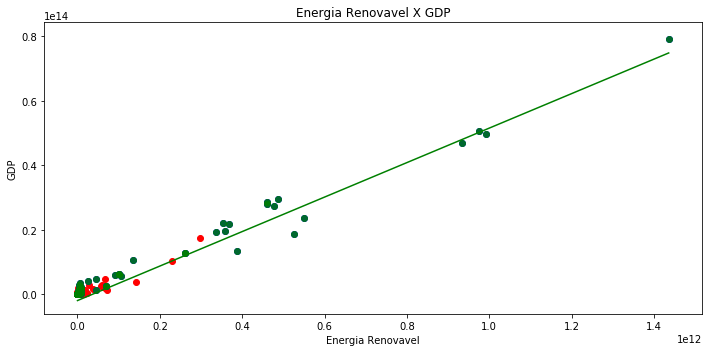

In [94]:
plt.scatter(Energy_Green.loc[Energy_Green.Paises=="sim","2014"], GDP2.loc[GDP2.Paises=="sim", "2014"], color="r")
# reta(Energy_Green.loc[Energy_Green.Paises=="sim",'1992'], GDP2.loc[GDP2.Paises=="sim", '1992'], "r")
plt.scatter(Energy_Green.loc[Energy_Green.Paises=="não","2014"], GDP2.loc[GDP2.Paises=="não", "2014"], color="b")
reta(Energy_Green.loc[Energy_Green.Paises=="não",'2014'], GDP2.loc[GDP2.Paises=="não", '2014'], "g")


## Terceira Parte: 
    Os Gráficos do tipo Boxplot servem para comparar as medias, medianas e as posições dos quartis 


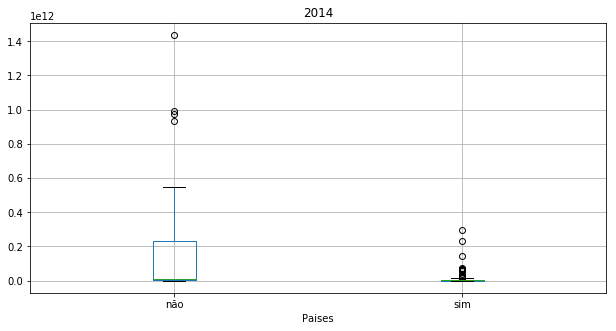

In [106]:
Energy_Green.boxplot(column="2014", by="Paises")

plt.suptitle("")
plt.show();


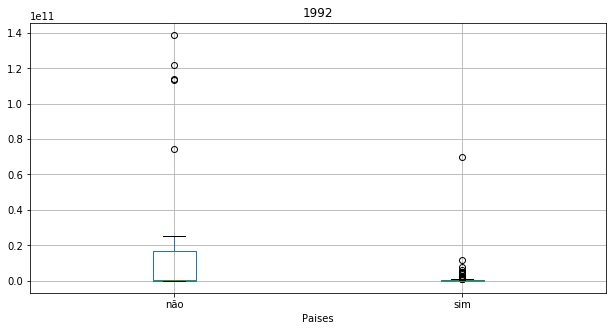

In [96]:
Energy_Green.boxplot(column="1992", by="Paises")
plt.suptitle("")
plt.show();


## Quarta Parte:
    Calculo do Co2 evitado

In [97]:
Co_2Evitado = []
for i in Energy_Green_Co:
    a = Energy_Green_Co[i].mean()
    evita = (a*305000)/(10**3)
    Co_2Evitado.append(evita)
print(Co_2Evitado)

[1706888444444.4446, 1768461166666.6665, 1869799111111.1113, 1968074005524.862, 2019639226519.337, 2158014861878.453, 2281416850828.7295, 2495284198895.0273, 2733882418478.261, 2862622255434.7827, 3217202989130.4346, 3554310869565.2173, 4055004836956.5215, 4600102324324.325, 5209187324324.325, 6048893540540.54, 7075662027027.027, 8323171378378.379, 10131053108108.107, 12163701702702.701, 14318149569892.475, 17165345887096.775, 19555853897849.46]


In [98]:
Co_2Evitado2345678 = []
for i in E:
    a = E[i].mean()
    evita = (a*305000)/(10**3)
    Co_2Evitado2345678.append(evita)
print(Co_2Evitado2345678)

[384812954545.4546, 398582318181.8182, 419253000000.0, 430929279279.27924, 443030360360.3603, 468515720720.72076, 491102207207.2072, 534250090090.0901, 580053318584.0708, 598820265486.7256, 676471106194.6904, 741716814159.2921, 843163053097.3451, 958893008849.5576, 1080083274336.2831, 1243584867256.6372, 1446075176991.1501, 1680576991150.4424, 2033834469026.5488, 2418674292035.3984, 2837228761061.947, 3365275530973.451, 3806389203539.823]


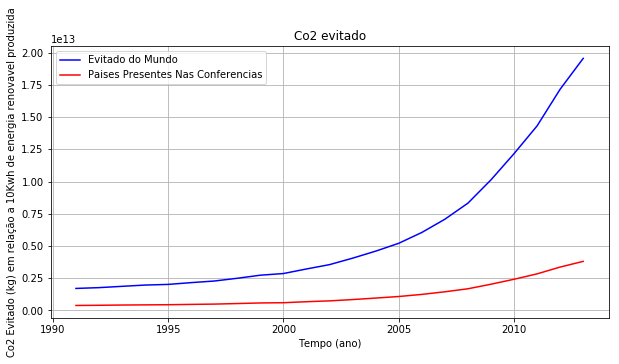

In [99]:
listaTempo = np.arange(1991,2014,1)
plt.plot(listaTempo, Co_2Evitado,color="b",label="Evitado do Mundo")
plt.plot(listaTempo, Co_2Evitado2345678, color="r", label="Paises Presentes Nas Conferencias")
plt.title("Co2 evitado")
plt.xlabel("Tempo (ano)")
plt.ylabel("Co2 Evitado (kg) em relação a 10Kwh de energia renovavel produzida")
plt.legend()
plt.grid(True)
plt.show()

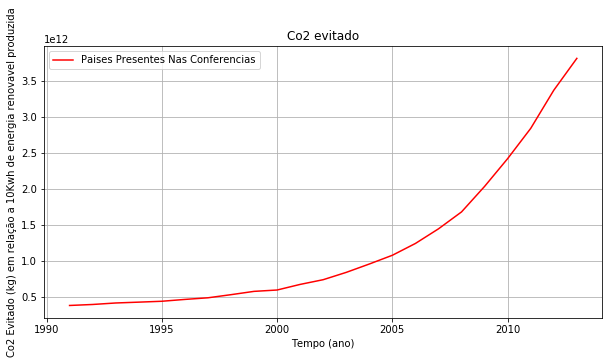

In [100]:
listaTempo = np.arange(1991,2014,1)
plt.plot(listaTempo, Co_2Evitado2345678, color="r", label="Paises Presentes Nas Conferencias")
plt.title("Co2 evitado")
plt.xlabel("Tempo (ano)")
plt.ylabel("Co2 Evitado (kg) em relação a 10Kwh de energia renovavel produzida")
plt.legend()
plt.grid(True)
plt.show()

---
# Conclusão das Análises #
---

### Parte 1

    O Primeiro Gráfico plotado, na parte 1, foi da produção média de energia renovávelde 1992 até 2014 em Kwh, neste gráfico podemos ver um crescimento do uso de energia renováveis
    pelo mundo como um todo.Apresentando, desta forma, um incentivo,desde essa conscientização por parte das Earth Summits, da produção de energia renováveis

### Parte 2

    Pode-se analisar que o quanto maior o PIB, maior a produção de energia renováveis, ou seja, há um incentivo do governo nesse financiamento de energias renovaveis. E que estão
    altamente correlacionadas, já que sua taxa de correlação foi de 0.9895, deve-se lembrar que quanto mais próximo de um, as duas variaveis são mais propensas de serem correlacionadas

### Parte 3

    De acordo com o boxplot do ano de 1992 e do ano de 2014, os países que mais investiram em energia renovaveis foram países que não estavam presentes nas primeiras conferências
    Sendo assim, seria possível concluir que os paises que estão de fora desse inicio de preocupação ambiental no seculo 20 estão investindo mais

### Parte 4
    Como minha hipotese no inicio era que haveria um grande impacto dos paises participantes e desejava ver a quantidade de Co2 evitada e se era significativa, calculei o Co2 evitado
    de 1992 a 2014
    Apresentando tambem que os países que estavam de fora dessa preocupação ambiental no final do seculo 20 estão evitando mais essa emissão de Co2 que os países que participaram logo
    de inicio.
    Desta forma, pode-se concluir que sim há um incentivo maior dos países a partir deste ano a investirem mais, mas os paises que estão de fora dessas conferencias iniciais
    apresentaram resultados melhores, ou seja, não houve um impacto tão significativo desses países.
    Contudo é inegavel que a quantidade de CO2 evitada(tende aumentar nos proximos anos tambem) é sginificativa e um resultado esperado e que a produção de energia renovavel so tendeu a aumentar

---
# Referência #
1. https://www.gapminder.org/data/ (dado GDP e entre outros)
2. https://data.worldbank.org/ (dados do produção de energia renovável e consumo de combustíveis fosséis )
3. https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions (Dados sobre as emissões de gases de efeito estufa)
4. https://data.worldbank.org/indicator/EN.ATM.GHGT.KT.CE?locations=LY (Dados da emissão de Gás ao todo no mundo)
5. https://www.umweltbundesamt.de/en/indicator-ghg-emissions-avoided-through-the-use-of#textpart-1 (Dados de emissão de gases de efeito estufa evitados na Alemanha)
6. https://nacoesunidas.org/conferencias-de-meio-ambiente-e-desenvolvimento-sustentavel-miniguia-da-onu/ (Sobre as Conferências Ambientalistas)
7. https://nacoesunidas.org/acao/meio-ambiente/
8. https://sustainabledevelopment.un.org/content/documents/Agenda21.pdf (Documento realizado durante a Conferência de 92)
9. https://sustainabledevelopment.un.org/outcomedocuments/agenda21 (Sobre a agenda 21)
10. https://sustainabledevelopment.un.org/milestones/unced (Conferências da ONU)
11. https://data.worldbank.org/topic/energy-and-mining?end=2018&start=1987
12. https://www.iea.org/topics/investment/
13. https://unfccc.int/resource/docs/convkp/kpeng.pdf protocolo de kyoto

---